In [2]:
import pandas as pd # P/ manipulação de dados em formato de dataframe
import numpy as np  # Biblioteca para operações matemáticas multidimensionais
import plotly.graph_objs as go # gráfico 3D
import matplotlib.pyplot as plt # Biblioteca de visualização de dados
import seaborn as sns # Biblioteca de visualização de parâmetros estatísticos
import plotly.express as px # Biblioteca para gráficos interativos
import plotly.io as pio # Biblioteca para gráficos interativos
pio.renderers.default = 'browser'


from scipy.spatial import distance_matrix # Construção da matriz de dissimilaridades
import scipy.cluster.hierarchy as sch # Elaboração de clusterização hierárquica

from sklearn.cluster import AgglomerativeClustering # Definição dos clusters
from sklearn.cluster import KMeans # Elaboração de clusterização não hierárquica k-means



import statsmodels.api as sm # Biblioteca de modelagem estatística
from statsmodels.formula.api import ols # Elaboração de ANOVA
from sklearn.preprocessing import StandardScaler



from sklearn.cluster import DBSCAN
from scipy import stats

import random




In [12]:
num_lojas = 10  # Número de lojas

nomes_lojas = [f"Loja {i+1}" for i in range(num_lojas)]

variaveis = {
    "fluxo": "Fluxo Mensal (pessoas)",
    "area": "Área da Loja (m²)",
    "vendas": "Vendas Mensais (R$)"
}

np.random.seed(42)

dados = {
    "loja": nomes_lojas,
    "fluxo": np.random.randint(1000, 10000, num_lojas),  # Fluxo entre 1000 e 10000 pessoas
    "area": np.random.randint(50, 500, num_lojas),  # Área entre 50 e 500 m²
    "vendas": np.random.randint(50000, 500000, num_lojas)  # Vendas entre R$50.000 e R$500.000
}

df_lojas = pd.DataFrame(dados)

print(df_lojas)



      loja  fluxo  area  vendas
0   Loja 1   8270   199  264176
1   Loja 2   1860   358  234779
2   Loja 3   6390   307  397449
3   Loja 4   6191   393  471909
4   Loja 5   6734   463  308795
5   Loja 6   7265   343  442752
6   Loja 7   1466   435  206730
7   Loja 8   5426   241  396622
8   Loja 9   6578   493  434681
9  Loja 10   9322   326  199503


In [10]:
# Características das variaveis 
df_lojas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   loja    10 non-null     object
 1   fluxo   10 non-null     int32 
 2   area    10 non-null     int32 
 3   vendas  10 non-null     int32 
dtypes: int32(3), object(1)
memory usage: 328.0+ bytes


In [13]:
# Gráfico interativo 3D com scatter
trace = go.Scatter3d( 
    x=df_lojas['fluxo'],
    y=df_lojas['area'],
    z=df_lojas['vendas'],
    mode='markers',
    marker={               ## define propriedades dos marcadores
        'size': 10,
        'opacity': 0.8,
    },
)

layout = go.Layout(
    margin={'l': 0, 'r': 0, 'b': 0, 't': 0}, ## remoção das margens
    width=800,
    height=800,
)

data = [trace]

plot_figure = go.Figure(data=data, layout=layout)
plot_figure.update_layout(scene = dict( ## atualiza o nome dos eixos
                        xaxis_title='fluxo',
                        yaxis_title='area',
                        zaxis_title='vendas'))
plot_figure.show()

In [14]:
# Estatísticas descritivas das variáveis do dataset
df_lojas.describe()

,fluxo,area,vendas
count,10.000000,10.000000,10.000000
mean,5950.200000,355.800000,335739.600000
std,2513.334695,93.793864,104638.089358
min,1466.000000,199.000000,199503.000000
25%,5617.250000,311.750000,242128.250000
50%,6484.000000,350.500000,352708.500000
75%,7132.250000,424.500000,425373.000000
max,9322.000000,493.000000,471909.000000


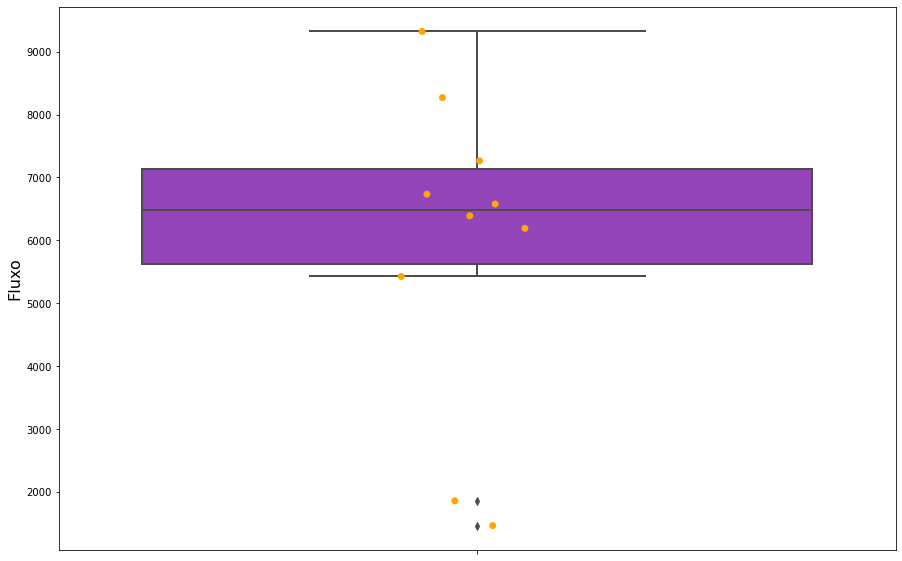

In [15]:
# Boxplots por variável - pacote seaborn
# Boxplot da variável 'fluxo'

plt.figure(figsize=(15,10))
sns.boxplot(data=df_lojas, y='fluxo',
            linewidth=2, orient='v', color='darkorchid')
sns.stripplot(data=df_lojas, y='fluxo',
              color="orange", jitter=0.1, size=7)
plt.ylabel('Fluxo mensal (qtd. de pessoas)', fontsize=16)
plt.show()

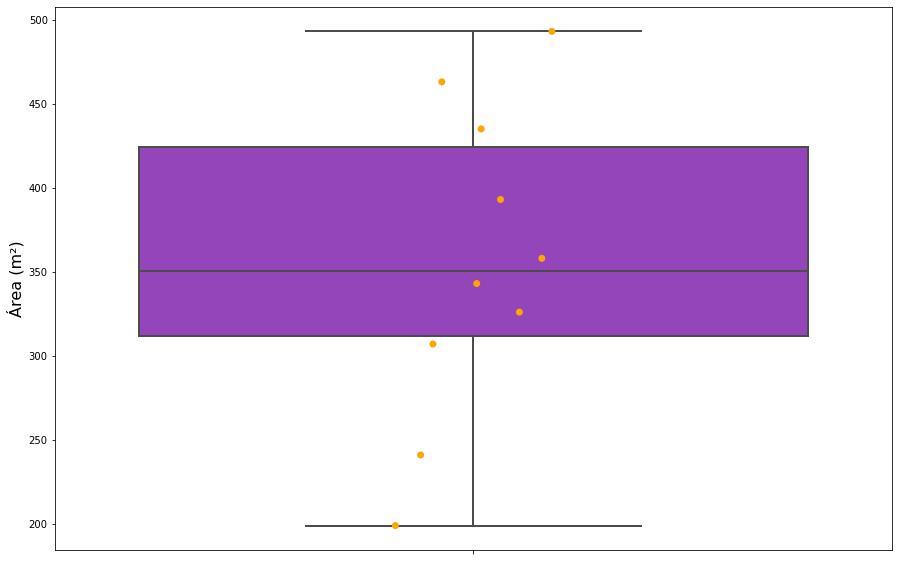

In [17]:
# Boxplot da variável 'area'
plt.figure(figsize=(15,10))
sns.boxplot(data=df_lojas, y='area',
            linewidth=2, orient='v', color='darkorchid')
sns.stripplot(data=df_lojas, y='area',
              color="orange", jitter=0.1, size=7)
plt.ylabel('Área (m²)', fontsize=16)
plt.show()

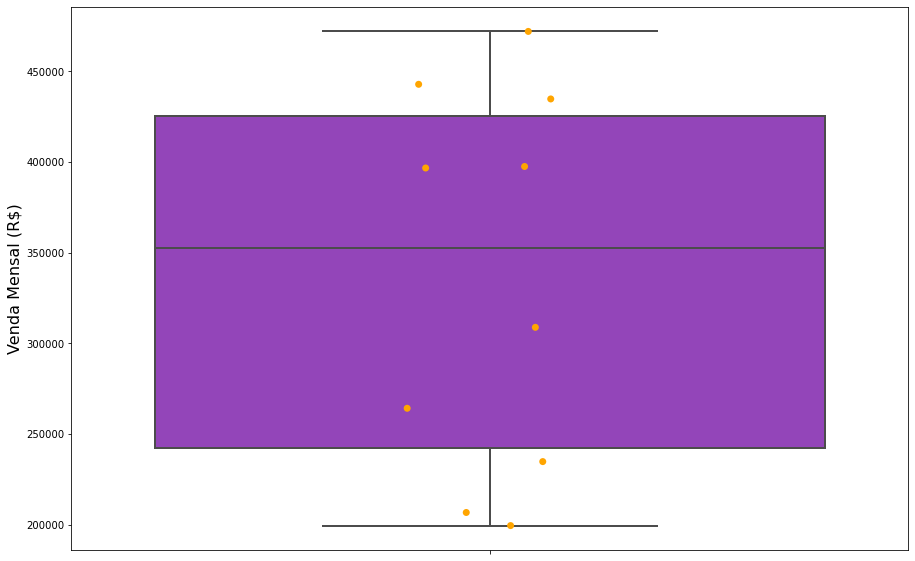

In [20]:
plt.figure(figsize=(15,10))
sns.boxplot(data=df_lojas, y='vendas',
            linewidth=2, orient='v', color='darkorchid')
sns.stripplot(data=df_lojas, y='vendas',
              color="orange", jitter=0.1, size=7)

plt.ylabel('Venda Mensal (R$)', fontsize=16)

plt.show()

In [29]:
# Como as variáveis estão em escalas distintas, é necessário aplicar o procedimento ZScores

cols_numericas = ['fluxo', 'area', 'vendas']
df_lojas_scaled = StandardScaler().fit_transform(df_lojas[cols_numericas])

df_lojas_zscores = pd.DataFrame(df_lojas_scaled, columns=cols_numericas)


df_lojas_zscores['loja'] = df_lojas['loja']
df_lojas_zscores = df_lojas_zscores[['loja'] + cols_numericas] ## reornando colunas


print("\nDataFrame com Z-scores:\n", df_lojas_zscores)


DataFrame com Z-scores:
       loja     fluxo      area    vendas
0   Loja 1  0.972924 -1.762180 -0.720910
1   Loja 2 -1.715430  0.024724 -1.017047
2   Loja 3  0.184452 -0.548434  0.621642
3   Loja 4  0.100992  0.418068  1.371729
4   Loja 5  0.328726  1.204756 -0.271432
5   Loja 6  0.551427 -0.143851  1.078011
6   Loja 7 -1.880673  0.890081 -1.299604
7   Loja 8 -0.219849 -1.290168  0.613311
8   Loja 9  0.263299  1.541908  0.996706
9  Loja 10  1.414133 -0.334904 -1.372406


In [30]:
# Visualizando a matriz de dissimilaridades

matriz_D = pd.DataFrame(distance_matrix(x = df_lojas_zscores.iloc[0:10, 1:4],
                                        y = df_lojas_zscores.iloc[0:10, 1:4]),
                        index=df_lojas['loja'],
                        columns=df_lojas['loja'])

matriz_D



loja,Loja 1,Loja 2,Loja 3,Loja 4,Loja 5,Loja 6,Loja 7,Loja 8,Loja 9,Loja 10
loja,,,,,,,,,,
Loja 1,0.000000,3.241600,1.974162,3.145297,3.069159,2.456169,3.938578,1.850851,3.790880,1.629795
Loja 2,3.241600,0.000000,2.573589,3.026608,2.475275,3.091330,0.925195,2.573668,3.205061,3.170138
Loja 3,1.974162,2.573589,0.000000,1.226264,1.972833,0.711779,3.166268,0.844807,2.125187,2.352432
Loja 4,3.145297,3.026608,1.226264,0.000000,1.835952,0.777764,3.359436,1.896367,1.195827,3.133942
Loja 5,3.069159,2.475275,1.972833,1.835952,0.000000,1.920764,2.457153,2.703396,1.313821,2.181927
Loja 6,2.456169,3.091330,0.711779,0.777764,1.920764,0.000000,3.554881,1.457688,1.712137,2.604862
Loja 7,3.938578,0.925195,3.166268,3.359436,2.457153,3.554881,0.000000,3.342314,3.208510,3.515912
Loja 8,1.850851,2.573668,0.844807,1.896367,2.703396,1.457688,3.342314,0.000000,2.898461,2.743265
Loja 9,3.790880,3.205061,2.125187,1.195827,1.313821,1.712137,3.208510,2.898461,0.000000,3.234120


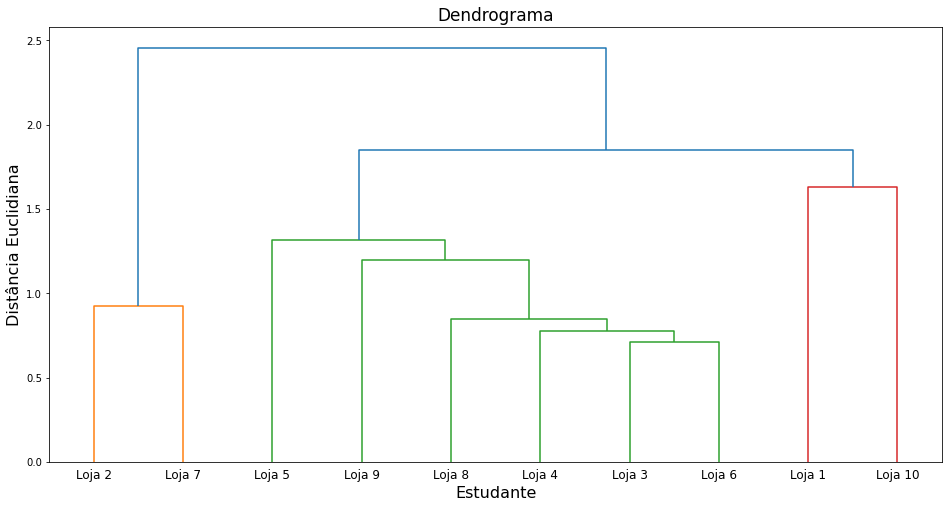

In [26]:
# Construção do dendrograma com uso da distância euclidiana e método de
# encadeamento single linkage

plt.figure(figsize=(16,8))
dendrogram = sch.dendrogram(sch.linkage(df_lojas_zscores.iloc[0:10, 1:4],
                                        method = 'single',
                                        metric = 'euclidean'),
                            labels = list(df_lojas.loja))

plt.title('Dendrograma', fontsize=17)
plt.xlabel('Loja', fontsize=16)
plt.ylabel('Distância Euclidiana', fontsize=16)
plt.axhline(y = 5, color = 'red', linestyle = '--', linewidth = 4)
plt.show()



In [31]:
# Coeficientes do esquema hierárquico de aglomeração

coeficientes = [y[1] for y in dendrogram['dcoord']]
coeficientes

[0.9251950138380205,
 0.7117793775894455,
 0.7777639834961189,
 0.8448068889678647,
 1.1958268804797119,
 1.3138207494904073,
 1.629794502080737,
 1.8508513061666707,
 2.4571533904328757]

In [54]:
# A existência de quatro clusters parece ser coerente pela análise visual do dendrograma, desta forma, pode-se utilizar
# esse valor como input para a análise de clusterização hierárquica

cluster_H = AgglomerativeClustering(n_clusters = 4,
                                    affinity = 'euclidean',
                                    linkage = 'single').fit_predict(df_lojas_zscores.iloc[0:10, 1:4])

In [71]:
# Visualização da base de dados com a alocação das observações nos clusters
# gerados por meio do procedimento hierárquico

df_lojas_zscores['cluster_H'] = cluster_H

df_lojas['cluster_H'] = cluster_H

df_lojas

,loja,fluxo,area,vendas,cluster_K,cluster_H
0,Loja 1,8270,199,264176,0,3
1,Loja 2,1860,358,234779,2,1
2,Loja 3,6390,307,397449,3,0
3,Loja 4,6191,393,471909,3,0
4,Loja 5,6734,463,308795,1,0
5,Loja 6,7265,343,442752,3,0
6,Loja 7,1466,435,206730,2,1
7,Loja 8,5426,241,396622,3,0
8,Loja 9,6578,493,434681,1,0
9,Loja 10,9322,326,199503,0,2


In [72]:
# Estatísticas descritivas das variáveis por 'cluster_H'

df_lojas.iloc[0:10].groupby('cluster_H').describe()

fluxo                                                            \
          count         mean         std     min      25%     50%     75%   
cluster_H                                                                   
0           6.0  6430.666667  612.907715  5426.0  6240.75  6484.0  6695.0   
1           2.0  1663.000000  278.600072  1466.0  1564.50  1663.0  1761.5   
2           1.0  9322.000000         NaN  9322.0  9322.00  9322.0  9322.0   
3           1.0  8270.000000         NaN  8270.0  8270.00  8270.0  8270.0   

                   area              ...     vendas           cluster_K  \
              max count        mean  ...        75%       max     count   
cluster_H                            ...                                  
0          7265.0   6.0  373.333333  ...  440734.25  471909.0       6.0   
1          1860.0   2.0  396.500000  ...  227766.75  234779.0       2.0   
2          9322.0   1.0  326.000000  ...  199503.00  199503.0       1.0   
3          8270.0   1.0  199.000000  ...  264176.00  264176.0       1.0   

                                                        
               mean       std  min  25%  50%  75%  max  
cluster_H                                               
0          2.333333  1.032796  1.0  1.5  3.0  3.0  3.0  
1          2.000000  0.000000  2.0  2.0  2.0  2.0  2.0  
2          0.000000       NaN  0.0  0.0  0.0  0.0  0.0  
3          0.000000       NaN  0.0  0.0  0.0  0.0  0.0  

[4 rows x 32 columns]

In [57]:
# Análise de variância de um fator (ANOVA)
# Variabilidades entre grupos e dentro dos grupos, estatísticas F e níveis de significância por variável

# ANOVA da variável 'fluxo'
modelo1 = ols('fluxo ~ C(cluster_H)', data = df_lojas_zscores).fit()
anova_table1 = sm.stats.anova_lm(modelo1, typ = 2)
anova_table1

,sum_sq,df,F,PR(>F)
C(cluster_H),9.655965,3.0,56.133585,0.000088
Residual,0.344035,6.0,NaN,NaN


In [58]:
# ANOVA da variável 'area'

modelo2 = ols('area ~ C(cluster_H)', data = df_lojas_zscores).fit()
anova_table2 = sm.stats.anova_lm(modelo2, typ = 2)
anova_table2

,sum_sq,df,F,PR(>F)
C(cluster_H),3.868839,3.0,1.262025,0.368434
Residual,6.131161,6.0,NaN,NaN


In [59]:
# ANOVA da variável 'vendas'

modelo3 = ols('vendas ~ C(cluster_H)', data = df_lojas_zscores).fit()
anova_table3 = sm.stats.anova_lm(modelo3, typ = 2)
anova_table3

,sum_sq,df,F,PR(>F)
C(cluster_H),8.327947,3.0,9.961342,0.009562
Residual,1.672053,6.0,NaN,NaN


In [23]:
# A única variável cuja média não é significativamente diferente entre os grupos é a área

In [60]:
# Elaboração da clusterização não hieráquica k-means

# Utilizaremos os 3 clusters identificados na análise hierárquia como input do argumento 'n_clusters = 3' na função 'KMeans'

kmeans = KMeans(n_clusters = 4,
                init = 'random').fit(df_lojas_zscores.iloc[0:10, 1:4])

cluster_K = kmeans.labels_



In [69]:
# Visualização da base de dados com a alocação das observações nos clusters gerados por meio do procedimento k-means

df_lojas_zscores['cluster_K'] = cluster_K

df_lojas['cluster_K'] = cluster_K

df_lojas

,loja,fluxo,area,vendas,cluster_K
0,Loja 1,8270,199,264176,0
1,Loja 2,1860,358,234779,2
2,Loja 3,6390,307,397449,3
3,Loja 4,6191,393,471909,3
4,Loja 5,6734,463,308795,1
5,Loja 6,7265,343,442752,3
6,Loja 7,1466,435,206730,2
7,Loja 8,5426,241,396622,3
8,Loja 9,6578,493,434681,1
9,Loja 10,9322,326,199503,0


In [63]:
# Identificação das coordenadas dos centróides dos clusters finais obtidos por meio do procedimento k-means

centroides = pd.DataFrame(kmeans.cluster_centers_)

centroides.columns = df_lojas_zscores.iloc[0:5, 1:4].columns

centroides.index.name = 'cluster'

centroides


,fluxo,area,vendas
cluster,,,
0,1.193528,-1.048542,-1.046658
1,0.296013,1.373332,0.362637
2,-1.798052,0.457403,-1.158325
3,0.154255,-0.391096,0.921173


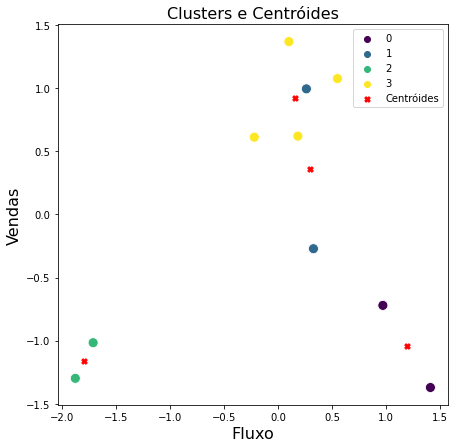

In [64]:
# Gráfico 2D de dispersão com as observações e respectivos centróides dos clusters
# variáveis 'matematica' e 'fisica' para uma plotagem 2D

plt.figure(figsize=(7,7))

pred_y = kmeans.fit_predict(df_lojas_zscores.iloc[0:10, 1:4])

sns.scatterplot(x = 'fluxo',
                y = 'vendas',
                data = df_lojas_zscores,
                hue = 'cluster_K',
                palette = 'viridis', s = 100)

plt.scatter(centroides['fluxo'], centroides['vendas'], s = 30, c = 'red', label = 'Centróides', marker="X")
plt.title('Clusters e Centróides', fontsize=16)
plt.xlabel('Fluxo', fontsize=16)
plt.ylabel('Vendas', fontsize=16)
plt.legend()
plt.show()



C:\Users\newto\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.



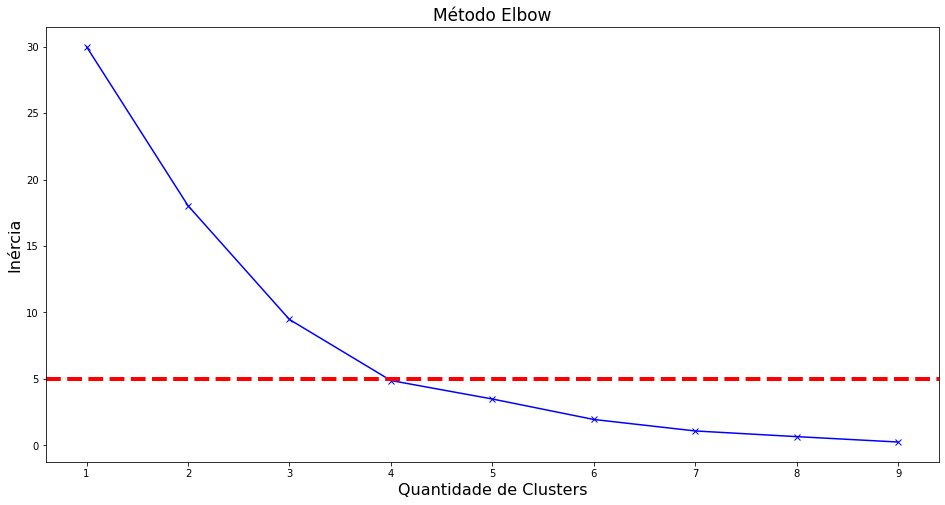

In [66]:
# Método Elbow (ou método do cotovelo) para a identificação da quantidade de clusters
# Elaborado com base na 'inércia' (distância de cada obervação para o centróide de seu cluster. Quanto mais próximas as observaçções entre si e do centróide,
# menor a inércia

import os
os.environ['OMP_NUM_THREADS'] = '1'


inercias = []

K = range(1,df_lojas_zscores.iloc[0:10, 1:4].shape[0])

for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(df_lojas_zscores.iloc[0:10, 1:4])
    inercias.append(kmeanModel.inertia_)
    
    
plt.figure(figsize=(16,8))
plt.plot(K, inercias, 'bx-')
plt.axhline(y = 5, color = 'red', linestyle = '--', linewidth = 4)
plt.xlabel('Quantidade de Clusters', fontsize=16)
plt.ylabel('Inércia', fontsize=16)
plt.title('Método Elbow', fontsize=17)
plt.show()

In [29]:
# Normalmente, busca-se o "cotovelo", ou seja, o ponto onde a curva
# eventualmente passa a ter uma inclinação baixa (pode-se adotar o ponto onde a curva passa a ter inclinação menor que 45º).

In [70]:
# Médias por 'cluster_K' 
df_lojas[['fluxo', 'area', 'vendas', 'cluster_K']].groupby('cluster_K').mean()

,fluxo,area,vendas
cluster_K,,,
0,8796.0,262.5,231839.5
1,6656.0,478.0,371738.0
2,1663.0,396.5,220754.5
3,6318.0,321.0,427183.0


In [31]:
# Média geral das variáveis 'matematica, 'fisica' e 'química'
df_vestibular[['matematica', 'fisica', 'quimica']].mean()

matematica    6.16
fisica        2.94
quimica       5.46
dtype: float64

In [79]:
# Variabilidades e estatística F para as variáveis 'matematica, 'fisica' e 'química'

# Definição de função para a elaboração de análise de variância de um fator (ANOVA)

def teste_f_kmeans(kmeans, dataframe):

    variaveis = dataframe.columns # Armazena o nome das colunas do dataframe nessa variável 
    
    centroides = pd.DataFrame(kmeans.cluster_centers_) # Coordenadas dos centroides 
    
    centroides.columns = dataframe.columns
        
    print("Centróides: \n", centroides ,"\n")
    
    df = dataframe[variaveis] # Cria uma cópia do DataFrame dataframe e a armazena na variável df.
    
    unique, counts = np.unique(kmeans.labels_, return_counts=True) # Valores únicos dos rótulos dos clusters e suas respectivas contagens.
    
    dic = dict(zip(unique, counts)) # Cria um dicionário que mapeia os rótulos dos clusters para suas respectivas contagens
    
    qnt_clusters = kmeans.n_clusters # Variável que armazena a quantidade de cluster
    
    observacoes = len(kmeans.labels_) # Armazena a quantidade total de amostras
    
    df['cluster'] = kmeans.labels_ # Nova coluna que identifica a qual cluster cada estudante foi alocado pelo algoritmo KMeans
    
    ANOVA = [] # Lista vazia 
    
    for variavel in variaveis: # Para cada variável, será calculada a variabilidade entre grupos e a variabilidade dentro dos grupos
        
        dic_var={'variavel':variavel} # Criação de dicionário que armazena o nome da variável atual.
        
        # Variabilidade entre os grupos
        # Soma ponderada do quadrado das diferenças entre o valor da variável em cada centroide e sua média geral
        # Itera retornando o índice e o valor da variável atual para cada centroide
        # Divide-se a soma pelos graus de liberdade entre os grupos.
        variabilidade_entre_grupos = np.sum([dic[index]*np.square(observacao - df[variavel].mean()) for index, observacao in enumerate(centroides[variavel])])/(qnt_clusters - 1)  
        
        
        dic_var['variabilidade_entre_grupos'] = variabilidade_entre_grupos # Armazena o valor calculado da variabilidade entre os grupos no dicionário 
        
        variabilidade_dentro_dos_grupos = 0 # Inicia a variável
        
        for grupo in unique: # Loop que itera sobre cada cluster único
            
            grupo = df[df.cluster == grupo] # Cria-se um dataframe contendo apenas as amostras alocadas no cluster atual
            
            # Adiciona à variável variabilidade dentro dos grupos
            # a soma do quadrado das diferenças entre o valor da variável para cada amostra dentro do grupo e a média dentro do grupo
            # Divide a soma por (número de amostras - número de clusters)
            variabilidade_dentro_dos_grupos += np.sum([np.square(observacao - grupo[variavel].mean()) for observacao in grupo[variavel]]) /(observacoes - qnt_clusters) 
        
        dic_var['variabilidade_dentro_dos_grupos'] = variabilidade_dentro_dos_grupos # Armazena o valor calculado da variabilidade dentro dos grupos
        
        dic_var['F'] =  dic_var['variabilidade_entre_grupos']/dic_var['variabilidade_dentro_dos_grupos'] # Cálculo da estatística F
        
        dic_var['sig F'] =  1 - stats.f.cdf(dic_var['F'], qnt_clusters - 1, observacoes - qnt_clusters) # Cálculo do p-value associado
        
        ANOVA.append(dic_var) #: Adiciona o dicionário dic_var (que contém os resultados da ANOVA para a variável atual) à lista ANOVA.
        
    df = pd.DataFrame(ANOVA)    
    
    print(df) 
    
    return df


In [80]:
ANOVA = teste_f_kmeans(kmeans, df_lojas_zscores.iloc[0:10, 1:4]) ## Aplucação da função 

Centróides: 
       fluxo      area    vendas
0  0.296013  1.373332  0.362637
1 -1.798052  0.457403 -1.158325
2  1.193528 -1.048542 -1.046658
3  0.154255 -0.391096  0.921173 

  variavel  variabilidade_entre_grupos  variabilidade_dentro_dos_grupos  \
0    fluxo                    3.195142                         0.069096   
1     area                    2.333741                         0.499796   
2   vendas                    2.843891                         0.244721   

           F     sig F  
0  46.242253  0.000153  
1   4.669385  0.051899  
2  11.620948  0.006532  


In [90]:
# Gráfico 3D dos clusters formados


fig = px.scatter_3d(df_lojas_zscores,
                    x='fluxo',
                    y='area',
                    z='vendas',
                    color='cluster_K',
                    text=df_lojas['loja'])
fig.show()